## Unit 1 Capstone: Research Proposal

### Importance

Electricity grid systems around the world are based on a centralized supply and demand systems, and represent an undeniable portion of the global economy.  
Although billing and general consumption is applied on the individaul property level, the grid as a whole is relaint on real-time demand of the entire population. As communities change and grow, the grid's opperation must adapt to accomated for these changes. Developed countries are continually finding new ways to lower electricty consumption while facing increases in demand. Additionally motivated by the growing recognition of global warming and environmental impacts, innovations and renewable energy sources have enabled both economic and environmental improvements. 

The Netherland's energy use is a good representation of the average European country. Every year, the Netherlands uses over 106 billion kWh in electrical energy, which corresponds to ~6,000 kWh per capita each year. source: [WorldEnergyData](https://www.worlddata.info/europe/netherlands/energy-consumption.php) This billion dollar industry is ripe with data and potential insights. Identifying changes and patterns in energy use would have plenty of economic and environmental implications. 


Price of energy in netherlands: [EnergyPriceData](https://www.statista.com/statistics/418106/electricity-prices-for-households-in-netherlands/)


### Data Source


The orginal Kaggle dataset is called "Energy consumption of the Netherlands, Electricity and Gas consumed in the Netherlands every year". [KaggleData](https://www.kaggle.com/lucabasa/dutch-energy) The downloadable file includes two folders, one for electrical and one for gas energy. Each folder includes twenty-nine comma seperated value files; which contain data from 2009 to 2018 for three different energy utility companies. 

For the electricity data, each 'csv' file contains following columns:  

- net_manager: code of the regional network manager
- purchase_area: code of the area where the energy is purchased
- street: Name of the street
- zipcode_from and zipcode_to: 2 columns for the range of zipcodes covered, 4 numbers and 2 letters
- city: Name of the city
- num_connections: Number of connections in the range of zipcodes
- delivery_perc: percentage of the net consumption of electricity or gas. The lower, the more energy was given back to the grid (for example if you have solar panels)
- perc_of_active_connections: Percentage of active connections in the zipcode range
- type_of_connection: principal type of connection in the zipcode range. For electricity is # fuses X # ampère. For gas is G4, G6, G10, G16, G25
- type_conn_perc: percentage of presence of the principal type of connection in the zipcode range
- annual_consume: Annual consume. Kwh for electricity, m3 for gas
- annual_consume_lowtarif_perc: Percentage of consume during the low tarif hours. From 10 p.m. to 7 a.m. and during weekends.
- smartmeter_perc: percentage of smartmeters in the zipcode ranges

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import numpy as np
from scipy import stats
import math
%matplotlib inline

In [12]:
## Example of electricity 'csv' file format

ExampleDataFrame = pd.read_csv("./dutch-energy/Electricity/liander_electricity_01012009.csv")
ExampleDataFrame.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Liander N.V. (NW),Liander NW,Rijksweg A44,1000AA,1011AA,NIEUW VENNEP,15,100.0,66.67,47,3x25,12958,46.67,0.0
1,Liander N.V. (NW),Liander NW,De Ruyterkade,1011AB,1011AB,AMSTERDAM,23,100.0,78.26,43,3x25,14761,39.13,0.0
2,Liander N.V. (NW),Liander NW,De Ruyterkade,1011AC,1011AC,AMSTERDAM,31,100.0,77.42,58,3x25,12139,16.13,0.0
3,Liander N.V. (NW),Liander NW,Oosterdokskade,1011AD,1011AD,AMSTERDAM,21,100.0,66.67,52,3x25,5082,47.62,0.0
4,Liander N.V. (NW),Liander NW,Oosterdokskade AB,1011AE,1011AE,AMSTERDAM,15,100.0,60.00,93,3x25,3712,33.33,0.0


### Data Cleaning 

For the purposes of my research project, I only need a small portion of the avialable columns. The orginal data is seperated by year and energy utility company. The years range from 2009 to 2018 and the three energy companies are labeled as: Liander, Leiden, and Stedin. To get a "good" sample and avoid bias, I created a sampling procedure that does a good job upholding to integrity of the original data. This procedure can be used to isolate any of the desired columns when producing a cleaned dataset. 


To take advantage of the provided data, my analysis will focus on the changes in energy consumption for the two largest cities in each Utility's jurisdiction. The cities in questions include Amsterdam, Rotterdam, Utrecht, Tilburg, Almere, and Groningen. In order to work with a simplified data set, I decided to create three new csv files which include only geographical and energy-consumption data.   

To ensure a random sample, I wrote a simple loop to collect 3,000 points of data at random for four different time periods. This way, the selected data will nigate any biases or time-dependant influences that may sway the results. For each of the three companies the raw data will be cleaned, joined, analysized, and minimized to only include the differences in energy use between different years. The time periods I've chosen for this proposal are from 2010-18, 2010-12, 2012-15, and 2015-18. The three final files will only include only 24,000 rows of data compared to the orginal millions. The resulting data is the difference in energy consumption of specific parts of the grid between the desinated years (periods). 

Below is a example of half the process (one city) for creating each of the final csv files. The Entire process can be viewed in the "DataCleaning" folder of this project.

In [13]:

## example of Data Cleaning (1st city from Liander)
df1 = pd.read_csv("./dutch-energy/Electricity/liander_electricity_01012010.csv")
df1['year'] = '2010'
df2 = pd.read_csv("./dutch-energy/Electricity/liander_electricity_01012012.csv")
df2['year'] = '2012'
df3 = pd.read_csv("./dutch-energy/Electricity/liander_electricity_01012015.csv")
df3['year'] = '2015'
df4 = pd.read_csv("./dutch-energy/Electricity/liander_electricity_01012018.csv")
df4['year'] = '2018'
df = pd.concat([df1,df2,df3,df4])


Ten = df.loc[(df['city']=='AMSTERDAM')&(df['year']=='2010'),'annual_consume']
Twelve = df.loc[(df['city']=='AMSTERDAM')&(df['year']=='2012'),'annual_consume']
Fifteen = df.loc[(df['city']=='AMSTERDAM')&(df['year']=='2015'), 'annual_consume']
Eighteen = df.loc[(df['city']=='AMSTERDAM')&(df['year']=='2018'), 'annual_consume']

Ten = Ten.reset_index(drop=True)
Twelve = Twelve.reset_index(drop=True)
Fifteen = Fifteen.reset_index(drop=True)
Eighteen = Eighteen.reset_index(drop=True)

## Collecting 3000 randomly selected data points for each time period

First = pd.DataFrame()
for n in range(3000):
    i = random.randint(1, 15000)
    diff = pd.DataFrame({'delta':Eighteen[i] - Ten[i]}, index=[i])
    First = pd.concat([First, diff])    
Second = pd.DataFrame()
for n in range(3000):
    i = random.randint(0, 15000)
    diff = pd.DataFrame({'delta':Twelve[i] - Ten[i]}, index=[i])
    Second = pd.concat([Second, diff])
Third = pd.DataFrame()
for n in range(3000):
    i = random.randint(0, 15000)
    diff = pd.DataFrame({'delta':Fifteen[i] - Twelve[i]}, index=[i])
    Third = pd.concat([Third, diff])  
Fourth = pd.DataFrame()
for n in range(3000):
    i = random.randint(0, 15000)
    diff = pd.DataFrame({'delta':Eighteen[i] - Fifteen[i]}, index=[i])
    Fourth = pd.concat([Third, diff])   

## combining each time period into one dataframe
First = First.reset_index()
First = First.rename(index=str, columns={"index": "original_index"})
First['period'] = 1
First['city'] = 'AMSTERDAM'
Second = Second.reset_index()
Second = Second.rename(index=str, columns={"index": "original_index"})
Second['period'] = 2
Second['city'] = 'AMSTERDAM'
Third = Third.reset_index()
Third = Third.rename(index=str, columns={"index": "original_index"})
Third['period'] = 3
Third['city'] = 'AMSTERDAM'
Fourth = Fourth.reset_index()
Fourth = Fourth.rename(index=str, columns={"index": "original_index"})
Fourth['period'] = 4
Fourth['city'] = 'AMSTERDAM'
Liander1 = pd.concat([First,Second,Third, Fourth])

In [14]:
Liander1.head()

,original_index,delta,period,city
0,14187,1950,1,AMSTERDAM
1,366,7526,1,AMSTERDAM
2,1261,381,1,AMSTERDAM
3,7130,-465,1,AMSTERDAM
4,12404,-212,1,AMSTERDAM


The resulting data will be combined into their own csv files. These "cleaned files" will be what is used in the experimentation. 

### Summary Statistics

Looking at general trends on how energy consumption changes over time is the first step in creating any useable insight.

In [15]:
## The final files
df1 = pd.read_csv('./StedinEnergy.csv')
df2 = pd.read_csv('./LianderEnergy.csv')
df3 = pd.read_csv('./EnexisEnergy.csv')
df = pd.concat([df1,df2,df3])

Firstperiod = df.loc[(df['period']==1), 'delta']
Secondperiod = df.loc[(df['period']==2), 'delta']
Thirdperiod = df.loc[(df['period']==3), 'delta']
Fourthperiod = df.loc[(df['period']==4), 'delta']

mean1 = Firstperiod.mean()
mean2 = Secondperiod.mean()
mean3 = Thirdperiod.mean()
mean4 = Fourthperiod.mean()
print(mean1, mean2, mean3, mean4)

-209.34301000000065 2.7960555555555557 -142.46044444444445 -140.89334610685327


The printed means above represent the average change in consumption for each of the four defined periods.


Below, there are plots that paint a picture for how Consumption has changed for each period and city.


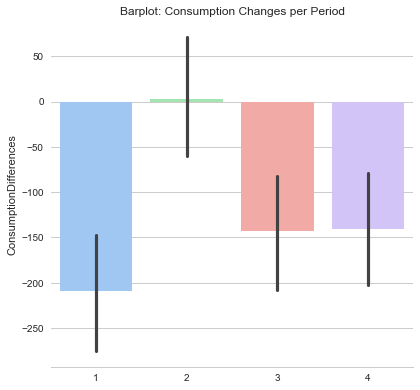

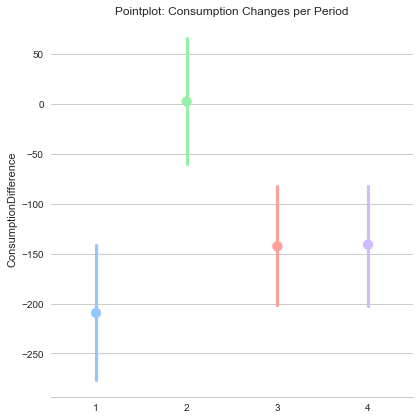

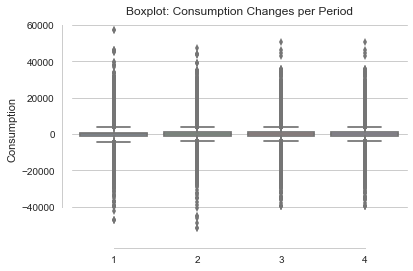

In [17]:
## Consumption plots per Period
sns.set(style="whitegrid")

g = sns.factorplot(x="period", y="delta", data=df,
                   size=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("ConsumptionDifferences")
g.set_xlabels("")
plt.title('Barplot: Consumption Changes per Period')
plt.subplots_adjust(top=0.9)
plt.show()



g = sns.factorplot(x="period", y="delta", data=df,
                   size=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
g.despine(left=True)
g.set_ylabels("ConsumptionDifference")
g.set_xlabels("")
plt.title('Pointplot: Consumption Changes per Period')
plt.show()


sns.set(style="whitegrid")
ax = sns.boxplot(x='period',y='delta',data=df,palette='pastel')  
plt.title('Boxplot: Consumption Changes per Period')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Consumption')

plt.show()

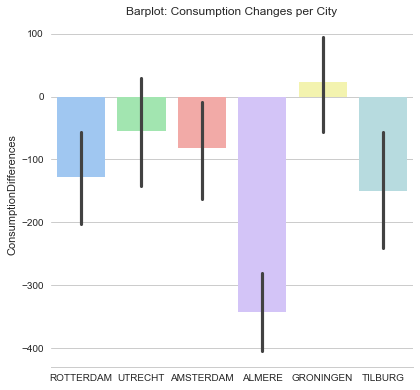

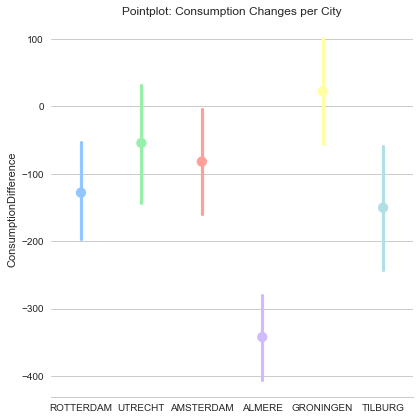

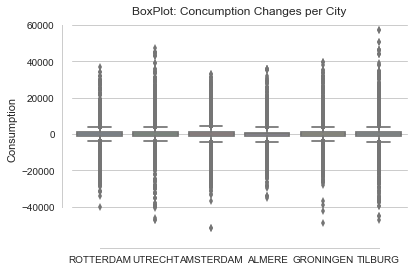

In [18]:
## Consumption plots per City
sns.set(style="whitegrid")

g = sns.factorplot(x="city", y="delta", data=df,
                   size=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("ConsumptionDifferences")
g.set_xlabels("")
plt.title('Barplot: Consumption Changes per City')
plt.subplots_adjust(top=0.9)
plt.show()


g = sns.factorplot(x="city", y="delta", data=df,
                   size=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
g.despine(left=True)
g.set_ylabels("ConsumptionDifference")
g.set_xlabels("")
plt.title('Pointplot: Consumption Changes per City')
plt.show()

ax = sns.boxplot(x='city',y='delta',data=df,palette='pastel')  

plt.title('BoxPlot: Concumption Changes per City')

sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Consumption')

plt.show()


Based on the above plots, it can be gathered that energy consumption varies over time. In general, it seems at different time frames lead to varied consumption rates for each city. 

### Hypothesis Testing 
Below is a run through of a A/B hypothesis test to determine the legitimacy of an initial (broad) question utilizing t-statistics and p-values. 
#### Broad Question: 
Does average energy consumption decrease over time? 

Setting up a two-tailed hypothesis test:

#### Null Hypothesis:
Larger time frames will have no effect on average energy consumption.
#### Alternative Hypothesis:
Larger time-frames will lead to a decrease in average energy consumption. 


For this experiment, I'm going to look at the average difference in energy consumption after two years compared to six years. I will be limiting this test to the city of Amsterdam( cleaned from the orginal Liander-Utility dataset). 

If the resulting p-value is less that 0.05, then the null hypothesis will be rejected. 

In [9]:
### creating population and sample
df1 = pd.read_csv("./dutch-energy/Electricity/liander_electricity_01012010.csv")
df1['year'] = '2010'
df2 = pd.read_csv("./dutch-energy/Electricity/liander_electricity_01012012.csv")
df2['year'] = '2012'
df4 = pd.read_csv("./dutch-energy/Electricity/liander_electricity_01012018.csv")
df4['year'] = '2018'
df = pd.concat([df1,df2,df4])

Ten = df.loc[(df['city']=='AMSTERDAM')&(df['year']=='2010'),'annual_consume']
Twelve = df.loc[(df['city']=='AMSTERDAM')&(df['year']=='2012'),'annual_consume']
Eighteen = df.loc[(df['city']=='AMSTERDAM')&(df['year']=='2018'), 'annual_consume']

Ten = Ten.reset_index(drop=True)
Twelve = Twelve.reset_index(drop=True)
Eighteen = Eighteen.reset_index(drop=True)

### Creating population(2010 to 2012) and Sample (2010 to 2018)
First = pd.DataFrame()
for n in range(15000):
    i = random.randint(1, 15000)
    diff = pd.DataFrame({'delta':Twelve[i] - Ten[i]}, index=[i])
    First = pd.concat([First, diff])    
Second = pd.DataFrame()
for n in range(3000):
    i = random.randint(0, 15000)
    diff = pd.DataFrame({'delta':Eighteen[i] - Ten[i]}, index=[i])
    Second = pd.concat([Second, diff])
print(stats.ttest_ind(First,Second))

Ttest_indResult(statistic=array([3.05717712]), pvalue=array([0.0022376]))


In this experiment, resulting P-value lies siginificantly below the common siginificance level of 0.05. This means that the null hypothesis can be rejected. 

#### Result:
 Based on this two tailed hypothesis test, the probability of longer time periods leading to a decrease in average energy consumption is supported. This means that in general, energy consumption descreases over time.

### Future Work 

In the Future, I'd like to make geographic plot by geocoding the city and zip code data. This would allow for interesting visualizations that provide easier to understand insights. 


It would be nice to convert the cleaned data into a relational database. Since I have a solid grasp on how the data is structured, I am in a position to create a processed table in PostgresSQL for future research. 

Somthing that might be useful is screening the data for anomalous values. In doing so I'd allow for a better selected sample that better represents the population. 



I'd also like to include some models such as time-series and mized-effects 

mixed effects 



Utilizing the geographical data, I plan to create 